In [20]:
import pandas as pd
import seaborn as sns
import requests
sns.set(style="darkgrid")

In [4]:
def url2df(url):
  f = requests.get(url)
  df = pd.read_json(f.text)
  df.scannedDevicesMinTimestamp= pd.to_datetime(df.scannedDevicesMinTimestamp)
  df.scannedDevicesMaxTimestamp= pd.to_datetime(df.scannedDevicesMaxTimestamp)
  df = df.rename(columns={'scannedDevicesMinTimestamp': 'scannedDevicesMinUTC',
                    'scannedDevicesMaxTimestamp': 'scannedDevicesMaxUTC'})
  df = df.sort_values("scannedDevicesMaxUTC") # sorting by last time!
  return df

In [5]:
def scannedDevices2df(scannedDevices):
  df = pd.json_normalize(scannedDevices)
  df.timestamp= pd.to_datetime(df.timestamp)
  df = df.rename(columns={'timestamp': 'timeUTC'})
  df = df.sort_values("timeUTC")
  return df

In [6]:
url1 = "https://us-central1-social-protection-46da6.cloudfunctions.net/getDeviceScans?device_id=7BB8BD884D95DBBD613526BE32778B20" #Jonatan's Pocophone
df1 = url2df(url=url1)
df1.tail()

,scannedDevicesMaxUTC,scanningDeviceEddystoneUid,device_seen_set,scannedDevicesMinUTC,scannedDevices
3,2020-03-25 14:17:10.484300000,7BB8BD884D95DBBD613526BE32778B20,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:14:25.754478800,"[{'rssi': -78, 'scannedDeviceRangingData': -15..."
11,2020-03-25 14:17:10.484450300,7BB8BD884D95DBBD613526BE32778B20,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:02:46.142586600,"[{'scannedDeviceRangingData': -15, 'scannedDev..."
10,2020-03-25 14:28:59.289772500,7BB8BD884D95DBBD613526BE32778B20,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:26:49.949664300,"[{'scannedDeviceRangingData': -15, 'scannedDev..."
16,2020-03-25 14:28:59.290272800,7BB8BD884D95DBBD613526BE32778B20,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:27:34.617214700,"[{'timestamp': 1585146454617214700, 'rssi': -7..."
6,2020-03-25 14:28:59.290964700,7BB8BD884D95DBBD613526BE32778B20,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:27:41.768124700,"[{'timestamp': 1585146461768124700, 'rssi': -4..."


In [7]:
url2 = "https://us-central1-social-protection-46da6.cloudfunctions.net/getDeviceScans?device_id=7BB8BD884D95DBBD613588BD06DA4164"  #Dor's OnePlus6
df2 = url2df(url=url2)
df2.tail()

,device_seen_set,scannedDevicesMinUTC,scannedDevices,scannedDevicesMaxUTC,scanningDeviceEddystoneUid
4,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 12:56:43.134170000,"[{'scannedDeviceRangingData': -15, 'scannedDev...",2020-03-25 13:28:56.878025500,7BB8BD884D95DBBD613588BD06DA4164
1,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 13:00:33.993046000,"[{'scannedDeviceRangingData': -15, 'scannedDev...",2020-03-25 13:41:10.701034200,7BB8BD884D95DBBD613588BD06DA4164
2,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 13:32:04.601434000,"[{'timestamp': 1585143124601434000, 'rssi': -7...",2020-03-25 14:11:56.044725500,7BB8BD884D95DBBD613588BD06DA4164
3,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 14:02:51.272697000,"[{'scannedDeviceRangingData': -15, 'scannedDev...",2020-03-25 14:29:17.339765500,7BB8BD884D95DBBD613588BD06DA4164
5,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 14:13:48.982749400,"[{'rssi': -85, 'scannedDeviceRangingData': -15...",2020-03-25 14:49:16.184692500,7BB8BD884D95DBBD613588BD06DA4164


,rssi,scannedDeviceRangingData,scannedDeviceEddystoneUid,timeUTC
0,-85,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:13:48.982749400
1,-90,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:13:49.272158700
2,-78,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:13:49.554945000
3,-77,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:13:49.850793200
4,-81,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:13:50.145502200
...,...,...,...,...
375,-43,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:48:45.244564000
376,-43,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:48:45.493246200
377,-42,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:48:54.998703600
378,-46,-15,7BB8BD884D95DBBD613526BE32778B20,2020-03-25 14:48:55.245143000


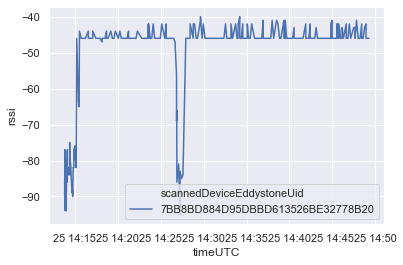

In [21]:
sd = scannedDevices2df(df2.scannedDevices[df2.index[-1]])
sns.lineplot(x="timeUTC", y="rssi", hue="scannedDeviceEddystoneUid", markers=True, data=sd)
sd

,timeUTC,rssi,scannedDeviceRangingData,scannedDeviceEddystoneUid
43,2020-03-25 14:28:44.029443300,-46,-15,7BB8BD884D95DBBD613588BD06DA4164
44,2020-03-25 14:28:49.532114700,-46,-15,7BB8BD884D95DBBD613588BD06DA4164
45,2020-03-25 14:28:54.124959500,-46,-15,7BB8BD884D95DBBD613588BD06DA4164
46,2020-03-25 14:28:54.343917800,-46,-15,7BB8BD884D95DBBD613588BD06DA4164
47,2020-03-25 14:28:59.290964700,-46,-15,7BB8BD884D95DBBD613588BD06DA4164


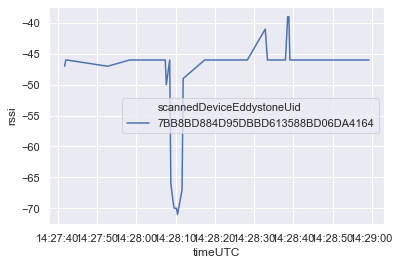

In [22]:
sd = scannedDevices2df(df1.scannedDevices[df1.index[-1]])
sns.lineplot(x="timeUTC", y="rssi", hue="scannedDeviceEddystoneUid", markers=True, data=sd)
sd.tail()